#### Import Libraries

In [1]:
import torch
import numpy as np
from LISTA_model import LISTA_train, LISTA_test
import time
import torch.nn as nn
import util

In [2]:
sparsity = 3
n = 100
m = 30
numTrain = 30000
numTest = 3000

sigma_lst = [1, 0.6, 0.3, 0.2, 0.1, 0.06, 0.03, 0.02, 0.01, 0.006]
seed = 80
np_seed = np.random.RandomState(seed)
generator = util.datagen(n, m, sparsity, np_seed)
A = generator.generate_measurement_matrix()

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
learning_rate = 5e-4
numEpochs = 25
numLayers = 10

loss_function = nn.MSELoss()

#### $\sigma = 1$

##### Structured

In [ ]:
X_train1, Y_train1, sigma1 = generator.data_gen(A, numTrain, [sigma_lst[0]], "structured")
X_test1, Y_test1, sigma1 = generator.data_gen(A, numTest, [sigma_lst[0]], "structured")

In [ ]:
start = time.time()

net1 = LISTA_train(X_train1, Y_train1[0], A, numEpochs, numLayers, device, learning_rate, sigma1[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net1.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.5519841313362122
Training - Epoch: 2, Loss: 0.30518677830696106
Training - Epoch: 3, Loss: 0.21570786833763123
Training - Epoch: 4, Loss: 0.16114558279514313
Training - Epoch: 5, Loss: 0.12521691620349884
Training - Epoch: 6, Loss: 0.10004164278507233
Training - Epoch: 7, Loss: 0.08166666328907013
Training - Epoch: 8, Loss: 0.06785952299833298
Training - Epoch: 9, Loss: 0.05725080147385597
Training - Epoch: 10, Loss: 0.048935409635305405
Training - Epoch: 11, Loss: 0.0423857681453228
Training - Epoch: 12, Loss: 0.037171244621276855
Training - Epoch: 13, Loss: 0.033027663826942444
Training - Epoch: 14, Loss: 0.02931477501988411
Training - Epoch: 15, Loss: 0.026302093639969826
Training - Epoch: 16, Loss: 0.023871397599577904
Training - Epoch: 17, Loss: 0.021900905296206474
Training - Epoch: 18, Loss: 0.020293720066547394
Training - Epoch: 19, Loss: 0.018978796899318695
Training - Epoch: 20, Loss: 0.01825326

C:\Users\Akshay Verma\AppData\Local\Temp\ipykernel_4404\3418673392.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  print('Threshold is ', net1.thr.T)


In [ ]:
X_est1 = LISTA_test(net1, Y_test1[0], A, device, [sigma1[0]]*3000)
X_est1 = X_est1.T
l1=loss_function(torch.tensor(X_est1),torch.tensor(X_test1))
l2=loss_function(torch.tensor(X_test1),torch.zeros_like(torch.tensor(X_test1)))
dbloss = l1.item()/l2.item()
mse1 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test1.T, X_est1.T)])
hr1 = np.mean(hr_list)
print(f"MSE = {mse1:.3f}dB\nHit Rate = {hr1:.2f}%")

MSE = 1.481dB
Hit Rate = 84.72%


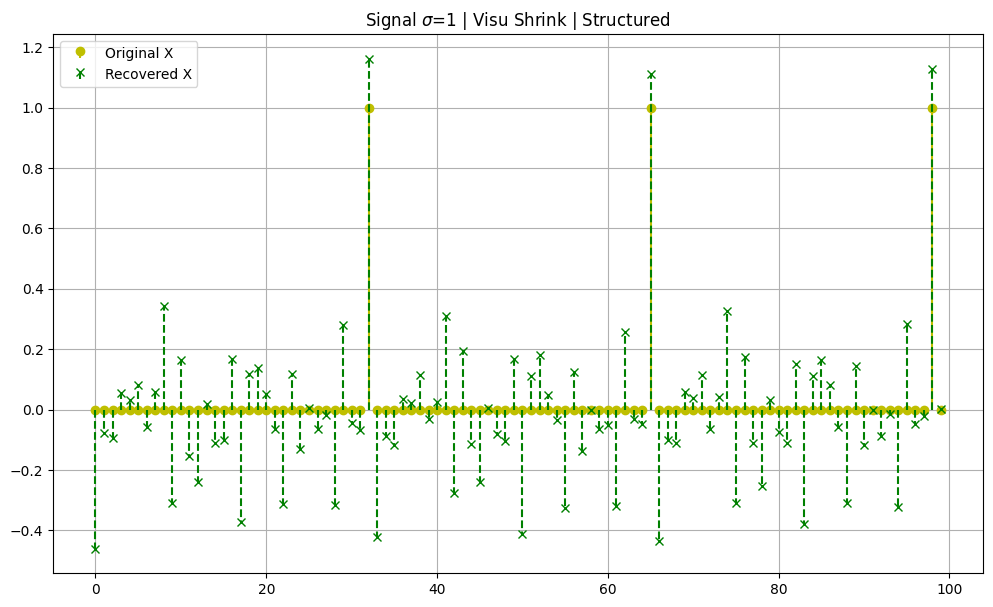

In [ ]:
plotter = util.plotter()
plotter.stem_plot(X_test1, X_est1, sigma1[0], "Structured", "Visu Shrink", 50)

##### Unstructured

In [ ]:
X_train1_u, Y_train1_u, sigma1_u = generator.data_gen(A, numTrain, [sigma_lst[0]], "unstructured")
X_test1_u, Y_test1_u, sigma1_u = generator.data_gen(A, numTest, [sigma_lst[0]], "unstructured")

In [ ]:
start = time.time()

net1_u = LISTA_train(X_train1_u, Y_train1_u[0], A, numEpochs, numLayers, device, learning_rate, sigma1_u[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net1_u.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 1.5247431993484497
Training - Epoch: 2, Loss: 1.2639824151992798
Training - Epoch: 3, Loss: 1.1594041585922241
Training - Epoch: 4, Loss: 1.114930510520935
Training - Epoch: 5, Loss: 1.0903466939926147
Training - Epoch: 6, Loss: 1.0792464017868042
Training - Epoch: 7, Loss: 1.0702296495437622
Training - Epoch: 8, Loss: 1.0665137767791748
Training - Epoch: 9, Loss: 1.0604898929595947
Training - Epoch: 10, Loss: 1.056012511253357
Training - Epoch: 11, Loss: 1.0543296337127686
Training - Epoch: 12, Loss: 1.0530896186828613
Training - Epoch: 13, Loss: 1.0097017288208008
Training - Epoch: 14, Loss: 1.0047383308410645
Training - Epoch: 15, Loss: 1.0041289329528809
Training - Epoch: 16, Loss: 1.0032628774642944
Training - Epoch: 17, Loss: 1.002742052078247
Training - Epoch: 18, Loss: 1.002414584159851
Training - Epoch: 19, Loss: 1.0010840892791748
Training - Epoch: 20, Loss: 0.9907291531562805
Training - Epoch: 21

In [ ]:
X_est1_u = LISTA_test(net1_u, Y_test1_u[0], A, device, [sigma1_u[0]]*3000)
X_est1_u = X_est1_u.T
l1_u=loss_function(torch.tensor(X_est1_u),torch.tensor(X_test1_u))
l2_u=loss_function(torch.tensor(X_test1_u),torch.zeros_like(torch.tensor(X_test1_u)))
dbloss_u = l1_u.item()/l2_u.item()
mse1_u = np.log(dbloss_u)*10
hr_list_u = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test1_u.T, X_est1_u.T)])
hr1_u = np.mean(hr_list_u)
print(f"MSE = {mse1_u:.3f}dB\nHit Rate = {hr1_u:.2f}%")

MSE = -1.707dB
Hit Rate = 40.97%


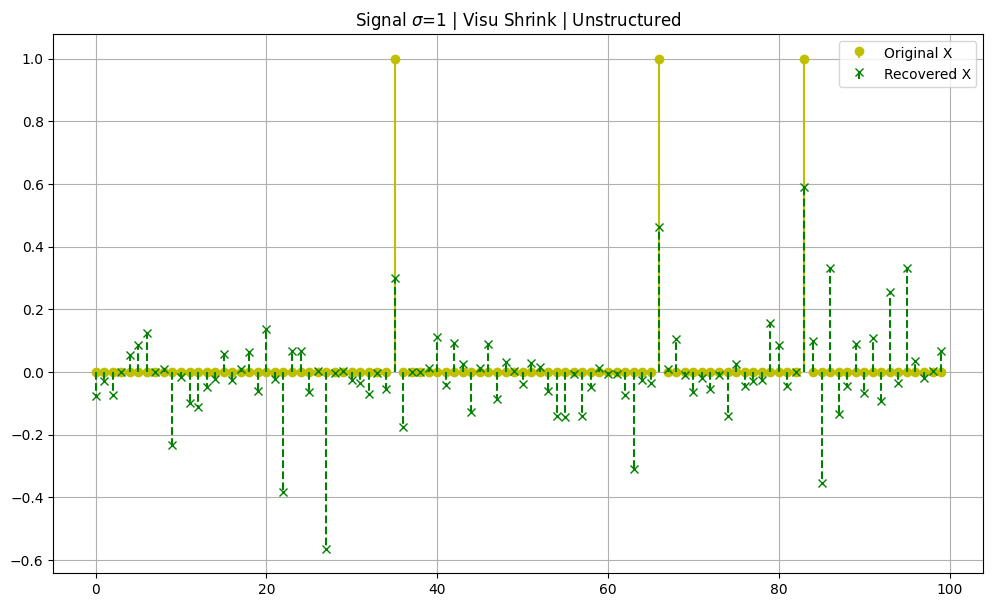

In [ ]:
plotter = util.plotter()
plotter.stem_plot(X_test1_u, X_est1_u, sigma1_u[0], "Unstructured", "Visu Shrink", 10)

#### $\sigma = 0.3$

##### Structured

In [13]:
X_train2, Y_train2, sigma2 = generator.data_gen(A, numTrain, [sigma_lst[2]], "structured")
X_test2, Y_test2, sigma2 = generator.data_gen(A, numTest, [sigma_lst[2]], "structured")

In [14]:
start = time.time()

net2 = LISTA_train(X_train2, Y_train2[0], A, numEpochs, numLayers, device, learning_rate, sigma2[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net2.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.6136496067047119
Training - Epoch: 2, Loss: 0.3358516991138458
Training - Epoch: 3, Loss: 0.25344589352607727
Training - Epoch: 4, Loss: 0.20397254824638367
Training - Epoch: 5, Loss: 0.1710788458585739
Training - Epoch: 6, Loss: 0.1473551243543625
Training - Epoch: 7, Loss: 0.12903131544589996
Training - Epoch: 8, Loss: 0.1174955740571022
Training - Epoch: 9, Loss: 0.10573708266019821
Training - Epoch: 10, Loss: 0.09696907550096512
Training - Epoch: 11, Loss: 0.08980843424797058
Training - Epoch: 12, Loss: 0.08724208921194077
Training - Epoch: 13, Loss: 0.07799948751926422
Training - Epoch: 14, Loss: 0.07484474778175354
Training - Epoch: 15, Loss: 0.07229124754667282
Training - Epoch: 16, Loss: 0.06987032294273376
Training - Epoch: 17, Loss: 0.06775791198015213
Training - Epoch: 18, Loss: 0.06572996079921722
Training - Epoch: 19, Loss: 0.06396083533763885
Training - Epoch: 20, Loss: 0.06265777349472046
T

In [19]:
X_est2 = LISTA_test(net2, Y_test2[0], A, device, [sigma2[0]]*3000)
X_est2 = X_est2.T
l1=loss_function(torch.tensor(X_est2),torch.tensor(X_test2))
l2=loss_function(torch.tensor(X_test2),torch.zeros_like(torch.tensor(X_test2)))
dbloss = l1.item()/l2.item()
mse2 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / (np.sum(a != 0)*1.05) * 100 for a, b in zip(X_test2.T, X_est2.T)])
hr2 = np.mean(hr_list)
print(f"MSE = {mse2:.3f}dB\nHit Rate = {hr2:.2f}%")

MSE = -22.431dB
Hit Rate = 95.24%


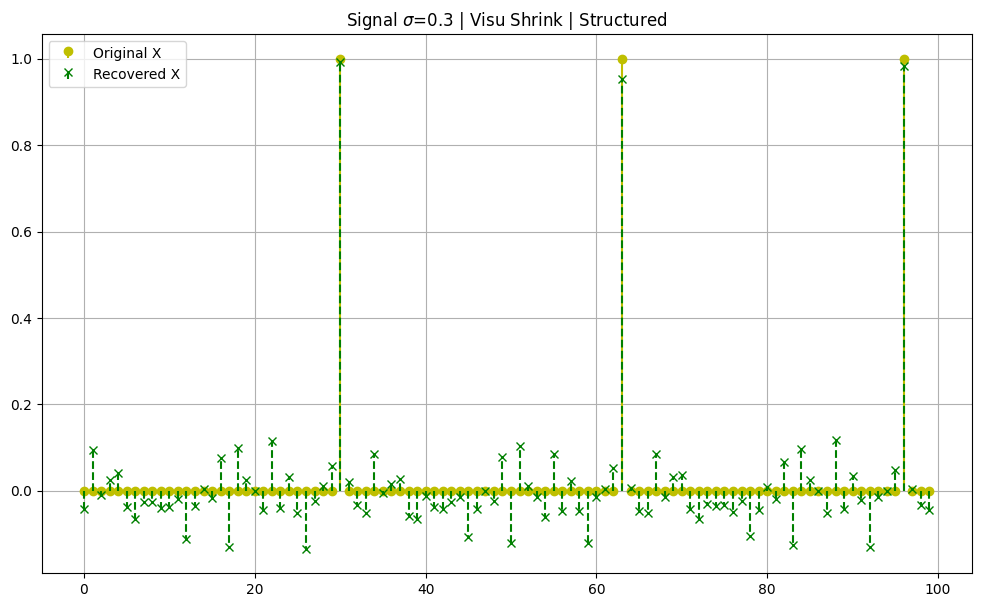

In [20]:
plotter = util.plotter()
plotter.stem_plot(X_test2, X_est2, sigma2[0], "Structured", "Visu Shrink", 50)

##### Unstructured

In [21]:
X_train2_u, Y_train2_u, sigma2_u = generator.data_gen(A, numTrain, [sigma_lst[2]], "unstructured")
X_test2_u, Y_test2_u, sigma2_u = generator.data_gen(A, numTest, [sigma_lst[2]], "unstructured")

In [22]:
start = time.time()

net2_u = LISTA_train(X_train2_u, Y_train2_u[0], A, numEpochs, numLayers, device, learning_rate, sigma2_u[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net2_u.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 1.9022436141967773
Training - Epoch: 2, Loss: 1.836945652961731
Training - Epoch: 3, Loss: 1.7886173725128174
Training - Epoch: 4, Loss: 1.7499721050262451
Training - Epoch: 5, Loss: 1.7214692831039429
Training - Epoch: 6, Loss: 1.6987545490264893
Training - Epoch: 7, Loss: 1.6813029050827026
Training - Epoch: 8, Loss: 1.665961503982544
Training - Epoch: 9, Loss: 1.6524752378463745
Training - Epoch: 10, Loss: 1.6412147283554077
Training - Epoch: 11, Loss: 1.6339893341064453
Training - Epoch: 12, Loss: 1.62456214427948
Training - Epoch: 13, Loss: 1.5480716228485107
Training - Epoch: 14, Loss: 1.5388286113739014
Training - Epoch: 15, Loss: 1.5344233512878418
Training - Epoch: 16, Loss: 1.5309826135635376
Training - Epoch: 17, Loss: 1.5274797677993774
Training - Epoch: 18, Loss: 1.5249576568603516
Training - Epoch: 19, Loss: 1.5218443870544434
Training - Epoch: 20, Loss: 1.5028802156448364
Training - Epoch: 21

In [23]:
X_est2_u = LISTA_test(net2_u, Y_test2_u[0], A, device, [sigma2_u[0]]*3000)
X_est2_u = X_est2_u.T
l1_u=loss_function(torch.tensor(X_est2_u),torch.tensor(X_test2_u))
l2_u=loss_function(torch.tensor(X_test2_u),torch.zeros_like(torch.tensor(X_test2_u)))
dbloss_u = l1_u.item()/l2_u.item()
mse2_u = np.log(dbloss_u)*10
hr_list_u = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test2_u.T, X_est2_u.T)])
hr2_u = np.mean(hr_list_u)
print(f"MSE = {mse2_u:.3f}dB\nHit Rate = {hr2_u:.2f}%")

MSE = -7.829dB
Hit Rate = 31.72%


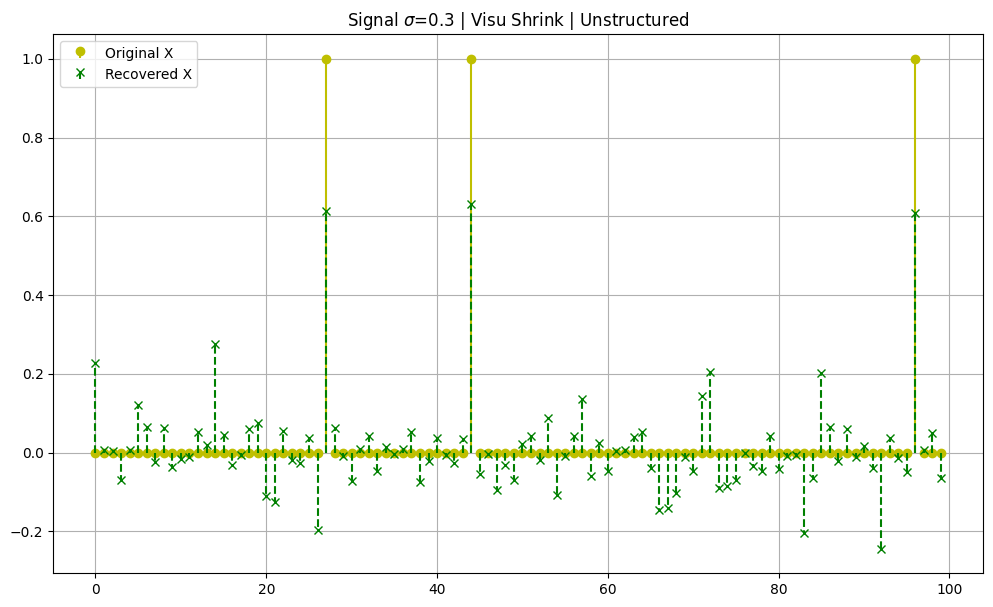

In [24]:
plotter = util.plotter()
plotter.stem_plot(X_test2_u, X_est2_u, sigma2_u[0], "Unstructured", "Visu Shrink", 10)

#### $\sigma = 0.06$

##### Structured

In [25]:
X_train3, Y_train3, sigma3 = generator.data_gen(A, numTrain, [sigma_lst[5]], "structured")
X_test3, Y_test3, sigma3 = generator.data_gen(A, numTest, [sigma_lst[5]], "structured")

In [26]:
start = time.time()

net3 = LISTA_train(X_train3, Y_train3[0], A, numEpochs, numLayers, device, learning_rate, sigma3[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net3.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.7890809774398804
Training - Epoch: 2, Loss: 0.5243830680847168
Training - Epoch: 3, Loss: 0.44041258096694946
Training - Epoch: 4, Loss: 0.3823608160018921
Training - Epoch: 5, Loss: 0.35373586416244507
Training - Epoch: 6, Loss: 0.3172098696231842
Training - Epoch: 7, Loss: 0.29923903942108154
Training - Epoch: 8, Loss: 0.2990686893463135
Training - Epoch: 9, Loss: 0.27877292037010193
Training - Epoch: 10, Loss: 0.2688570022583008
Training - Epoch: 11, Loss: 0.261953204870224
Training - Epoch: 12, Loss: 0.25606441497802734
Training - Epoch: 13, Loss: 0.23009754717350006
Training - Epoch: 14, Loss: 0.22236239910125732
Training - Epoch: 15, Loss: 0.21932534873485565
Training - Epoch: 16, Loss: 0.21706390380859375
Training - Epoch: 17, Loss: 0.21496552228927612
Training - Epoch: 18, Loss: 0.2121187001466751
Training - Epoch: 19, Loss: 0.21020470559597015
Training - Epoch: 20, Loss: 0.2072044461965561
Traini

In [34]:
X_est3 = LISTA_test(net3, Y_test3[0], A, device, [sigma3[0]]*3000)
X_est3 = X_est3.T
l1=loss_function(torch.tensor(X_est3),torch.tensor(X_test3))
l2=loss_function(torch.tensor(X_test3),torch.zeros_like(torch.tensor(X_test3)))
dbloss = l1.item()/l2.item()
mse3 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / (np.sum(a != 0)) * 100 for a, b in zip(X_test3.T, X_est3.T)])
hr3 = np.mean(hr_list)
print(f"MSE = {mse3:.3f}dB\nHit Rate = {hr3:.2f}%")

MSE = -29.177dB
Hit Rate = 100.00%


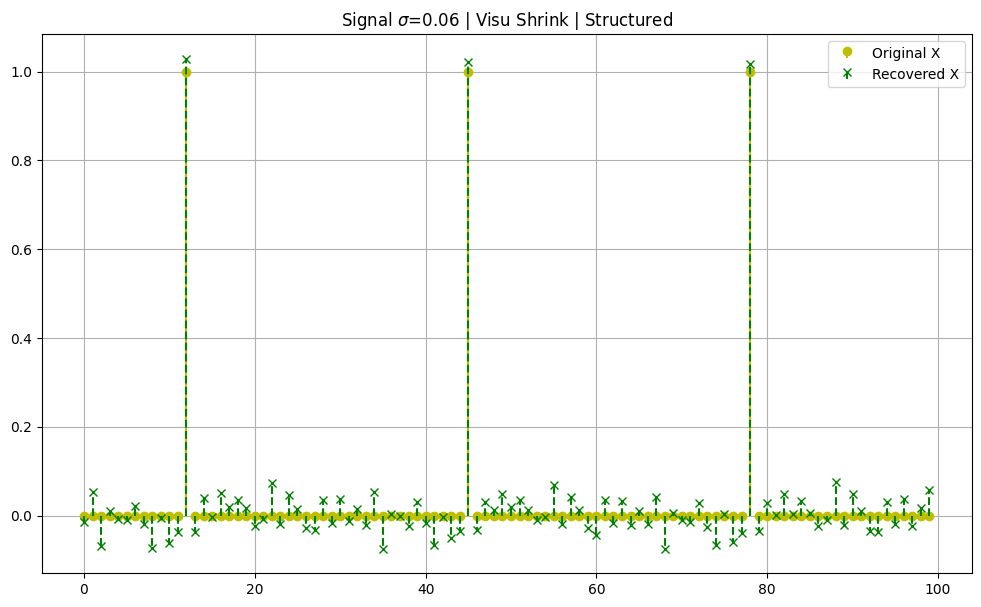

In [31]:
plotter = util.plotter()
plotter.stem_plot(X_test3, X_est3, sigma3[0], "Structured", "Visu Shrink", 20)

##### Unstructured

In [29]:
X_train3_u, Y_train3_u, sigma3_u = generator.data_gen(A, numTrain, [sigma_lst[5]], "unstructured")
X_test3_u, Y_test3_u, sigma3_u = generator.data_gen(A, numTest, [sigma_lst[5]], "unstructured")

In [35]:
start = time.time()

net3_u = LISTA_train(X_train3_u, Y_train3_u[0], A, numEpochs, numLayers, device, learning_rate, sigma3_u[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net3_u.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 2.0808451175689697
Training - Epoch: 2, Loss: 2.0601086616516113
Training - Epoch: 3, Loss: 2.0542428493499756
Training - Epoch: 4, Loss: 2.048957586288452
Training - Epoch: 5, Loss: 2.0445964336395264
Training - Epoch: 6, Loss: 2.0434443950653076
Training - Epoch: 7, Loss: 2.038081645965576
Training - Epoch: 8, Loss: 2.0361623764038086
Training - Epoch: 9, Loss: 2.033782958984375
Training - Epoch: 10, Loss: 2.0317323207855225
Training - Epoch: 11, Loss: 2.0326287746429443
Training - Epoch: 12, Loss: 2.029254913330078
Training - Epoch: 13, Loss: 1.9948915243148804
Training - Epoch: 14, Loss: 1.9906737804412842
Training - Epoch: 15, Loss: 1.9902139902114868
Training - Epoch: 16, Loss: 1.989597201347351
Training - Epoch: 17, Loss: 1.9895247220993042
Training - Epoch: 18, Loss: 1.9883171319961548
Training - Epoch: 19, Loss: 1.987705111503601
Training - Epoch: 20, Loss: 1.9788826704025269
Training - Epoch: 21, 

In [39]:
X_est3_u = LISTA_test(net3_u, Y_test3_u[0], A, device, [sigma3_u[0]]*3000)
X_est3_u = X_est3_u.T
l1_u=loss_function(torch.tensor(X_est3_u),torch.tensor(X_test3_u))
l2_u=loss_function(torch.tensor(X_test3_u),torch.zeros_like(torch.tensor(X_test3_u)))
dbloss_u = l1_u.item()/l2_u.item()
mse3_u = np.log(dbloss_u)*10
hr_list_u = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test3_u.T, X_est3_u.T)])
hr3_u = np.mean(hr_list_u)
print(f"MSE = {mse3_u:.3f}dB\nHit Rate = {hr3_u:.2f}%")

MSE = -3.816dB
Hit Rate = 0.00%


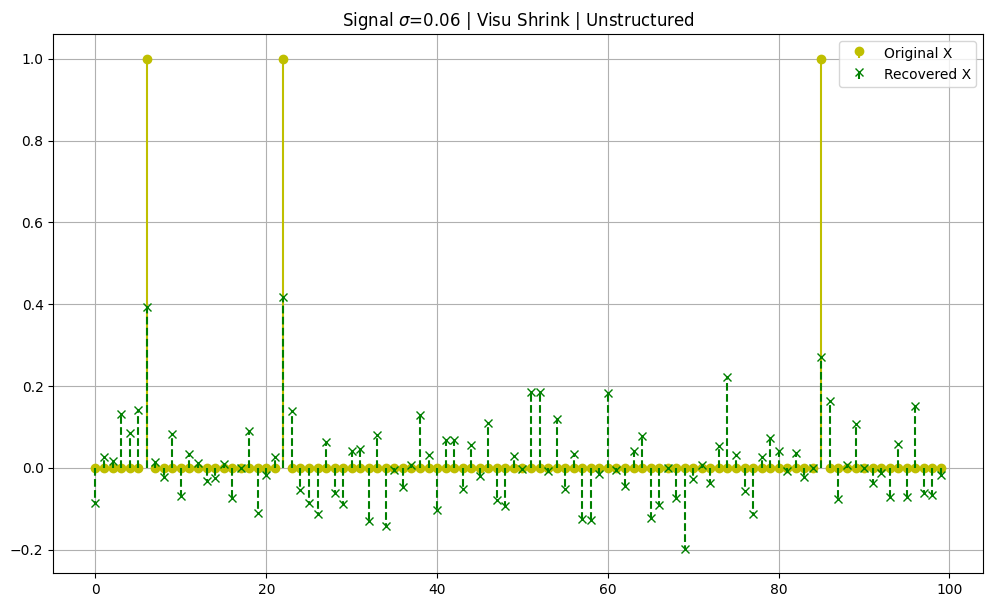

In [42]:
plotter = util.plotter()
plotter.stem_plot(X_test3_u, X_est3_u, sigma3_u[0], "Unstructured", "Visu Shrink", 40)

#### $\sigma = Mixed$

##### Structured

In [44]:
X_train4, Y_train4, sigma4 = util.data_mix(np_seed, X_train1, Y_train1, sigma1, X_train2, Y_train2, sigma2, X_train3, Y_train3, sigma3)
X_test4, Y_test4, sigma4 = util.data_mix(np_seed, X_test1, Y_test1, sigma1, X_test2, Y_test2, sigma2, X_test3, Y_test3, sigma3)

IndexError: index 29089 is out of bounds for axis 1 with size 30

In [ ]:
start = time.time()

net3 = LISTA_train(X_train3, Y_train3[0], A, numEpochs, numLayers, device, learning_rate, sigma3[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net3.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.7890809774398804
Training - Epoch: 2, Loss: 0.5243830680847168
Training - Epoch: 3, Loss: 0.44041258096694946
Training - Epoch: 4, Loss: 0.3823608160018921
Training - Epoch: 5, Loss: 0.35373586416244507
Training - Epoch: 6, Loss: 0.3172098696231842
Training - Epoch: 7, Loss: 0.29923903942108154
Training - Epoch: 8, Loss: 0.2990686893463135
Training - Epoch: 9, Loss: 0.27877292037010193
Training - Epoch: 10, Loss: 0.2688570022583008
Training - Epoch: 11, Loss: 0.261953204870224
Training - Epoch: 12, Loss: 0.25606441497802734
Training - Epoch: 13, Loss: 0.23009754717350006
Training - Epoch: 14, Loss: 0.22236239910125732
Training - Epoch: 15, Loss: 0.21932534873485565
Training - Epoch: 16, Loss: 0.21706390380859375
Training - Epoch: 17, Loss: 0.21496552228927612
Training - Epoch: 18, Loss: 0.2121187001466751
Training - Epoch: 19, Loss: 0.21020470559597015
Training - Epoch: 20, Loss: 0.2072044461965561
Traini

In [ ]:
X_est3 = LISTA_test(net3, Y_test3[0], A, device, [sigma3[0]]*3000)
X_est3 = X_est3.T
l1=loss_function(torch.tensor(X_est3),torch.tensor(X_test3))
l2=loss_function(torch.tensor(X_test3),torch.zeros_like(torch.tensor(X_test3)))
dbloss = l1.item()/l2.item()
mse3 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / (np.sum(a != 0)) * 100 for a, b in zip(X_test3.T, X_est3.T)])
hr3 = np.mean(hr_list)
print(f"MSE = {mse3:.3f}dB\nHit Rate = {hr3:.2f}%")

MSE = -29.177dB
Hit Rate = 100.00%


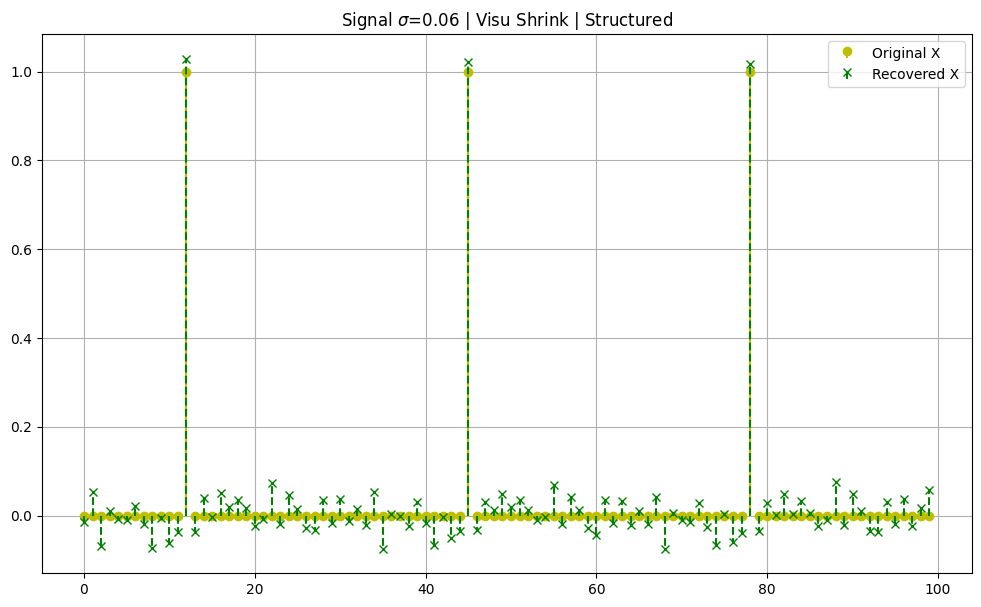

In [ ]:
plotter = util.plotter()
plotter.stem_plot(X_test3, X_est3, sigma3[0], "Structured", "Visu Shrink", 20)

##### Unstructured

In [ ]:
X_train3_u, Y_train3_u, sigma3_u = generator.data_gen(A, numTrain, [sigma_lst[5]], "unstructured")
X_test3_u, Y_test3_u, sigma3_u = generator.data_gen(A, numTest, [sigma_lst[5]], "unstructured")

In [ ]:
start = time.time()

net3_u = LISTA_train(X_train3_u, Y_train3_u[0], A, numEpochs, numLayers, device, learning_rate, sigma3_u[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net3_u.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 2.0808451175689697
Training - Epoch: 2, Loss: 2.0601086616516113
Training - Epoch: 3, Loss: 2.0542428493499756
Training - Epoch: 4, Loss: 2.048957586288452
Training - Epoch: 5, Loss: 2.0445964336395264
Training - Epoch: 6, Loss: 2.0434443950653076
Training - Epoch: 7, Loss: 2.038081645965576
Training - Epoch: 8, Loss: 2.0361623764038086
Training - Epoch: 9, Loss: 2.033782958984375
Training - Epoch: 10, Loss: 2.0317323207855225
Training - Epoch: 11, Loss: 2.0326287746429443
Training - Epoch: 12, Loss: 2.029254913330078
Training - Epoch: 13, Loss: 1.9948915243148804
Training - Epoch: 14, Loss: 1.9906737804412842
Training - Epoch: 15, Loss: 1.9902139902114868
Training - Epoch: 16, Loss: 1.989597201347351
Training - Epoch: 17, Loss: 1.9895247220993042
Training - Epoch: 18, Loss: 1.9883171319961548
Training - Epoch: 19, Loss: 1.987705111503601
Training - Epoch: 20, Loss: 1.9788826704025269
Training - Epoch: 21, 

In [ ]:
X_est3_u = LISTA_test(net3_u, Y_test3_u[0], A, device, [sigma3_u[0]]*3000)
X_est3_u = X_est3_u.T
l1_u=loss_function(torch.tensor(X_est3_u),torch.tensor(X_test3_u))
l2_u=loss_function(torch.tensor(X_test3_u),torch.zeros_like(torch.tensor(X_test3_u)))
dbloss_u = l1_u.item()/l2_u.item()
mse3_u = np.log(dbloss_u)*10
hr_list_u = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test3_u.T, X_est3_u.T)])
hr3_u = np.mean(hr_list_u)
print(f"MSE = {mse3_u:.3f}dB\nHit Rate = {hr3_u:.2f}%")

MSE = -3.816dB
Hit Rate = 0.00%


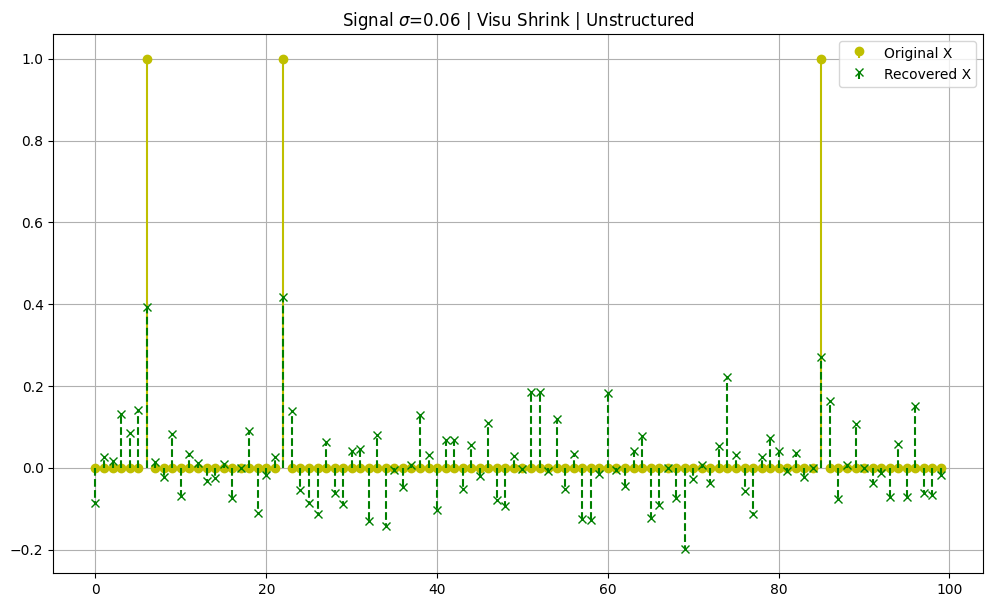

In [ ]:
plotter = util.plotter()
plotter.stem_plot(X_test3_u, X_est3_u, sigma3_u[0], "Unstructured", "Visu Shrink", 40)